for p = 1:
we have the following non linear problem to minimize.$$\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|$$
convert into linmear $$R_i-a_0-a_1T_i-a_2D_i = y_i$$ for i = 1,2,..,6 
$$y_i_1 = y_i$$ if yi>0 and yi1 = 0 if yi<=0
yi2 = 0 if yi>0 and yi2 = -yi if yi<= 0
so |yi| = |yi1-yi2|
 so |yi| = yi1 + yi2
 so our linear objecive function  
 min$$\sum_{i=1}^6|R_i-a_0-a_1T_i-a_2D_i|$$
 $$\sum_{i=1}^6|yi|$$
so objective
 min$$\sum_{i=1}^6yi1+yi2$$
 yi1-yi2 = Ri - a0-a1Ti-a2Di for  i = 1,2,..6

yij>= 0 for i 1,2,...6,j = 1,2
and $a_0>0$,$a1,a2\in R$  


In [1]:
!pip install -q pyomo

In [2]:
from pyomo.environ import *

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Lab8_ex2.csv")
df

i    Ri    Vi     Bi   Ai   Averagev  Averagesk
0  1   175   945   2800   23   2.962963   0.024339
1  2   450   832   3900   40   4.687500   0.048077
2  3  1050  2007  24900   78  12.406577   0.038864
3  4   900   800  36450   64  45.562500   0.080000
4  5    19   780    366    4   0.469231   0.005128
5  6  3550  5005  38500  150   7.692308   0.029970

In [5]:
model_lab8_ex2 = ConcreteModel()

In [6]:
model_lab8_ex2.constraints = ConstraintList()

In [7]:
model_lab8_ex2.y = Var([i for i in range(6)],domain = Reals)

In [8]:
model_lab8_ex2.x = Var([i for i in range(6)],[i for i in range(2)],domain = NonNegativeReals)

In [9]:
model_lab8_ex2.a0 = Var(domain = NonNegativeReals)
model_lab8_ex2.a1 = Var(domain = Reals)
model_lab8_ex2.a2 = Var(domain = Reals)

In [10]:
model_lab8_ex2.objective = Objective(expr = sum(model_lab8_ex2.x[i,j] for i in range(6) for j in range(2)))

In [11]:
for i in range(6):
  model_lab8_ex2.constraints.add(expr = model_lab8_ex2.x[i,0]-model_lab8_ex2.x[i,1]==df["Ri"][i] - model_lab8_ex2.a0-df["Averagev"][i]*model_lab8_ex2.a1-df["Averagesk"][i]*model_lab8_ex2.a2)

In [12]:
model_lab8_ex2.pprint()

5 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   12 : {(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1)}
    x_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    x_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {0, 1}
    y_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

5 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : 

In [13]:
!apt-get install -y -qq coinor-cbc

In [14]:
opt_cbc = SolverFactory('cbc')

In [32]:
result = opt_cbc.solve(model_lab8_ex2)
print('Solver time:', result.solver.time)
print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver time: 0.03018498420715332
Solver status: ok
Solver termination condition: optimal


In [35]:
print('\n optimal Objective value = ', model_lab8_ex2.objective())
#dicision variable
print("optimal decision variable")
print("a0 =",  model_lab8_ex2.a0())
print("a1= " , model_lab8_ex2.a1())
print("a2= ", model_lab8_ex2.a2())

df


 optimal Objective value =  3986.158753
optimal decision variable
a0 = 0.0
a1=  4.0039722
a2=  8969.6127


i    Ri    Vi     Bi   Ai   Averagev  Averagesk  forecast_Ri if p = 1.5  \
0  1   175   945   2800   23   2.962963   0.024339              628.702106   
1  2   450   832   3900   40   4.687500   0.048077              747.407462   
2  3  1050  2007  24900   78  12.406577   0.038864              724.183923   
3  4   900   800  36450   64  45.562500   0.080000             1012.052169   
4  5    19   780    366    4   0.469231   0.005128              529.647911   
5  6  3550  5005  38500  150   7.692308   0.029970              668.629011   

   forecast_Ri if p = 2  forecast_Ri if p = 1  
0            965.201228            230.171652  
1           1041.921564            449.999999  
2           1027.716847            398.270402  
3           1216.663242            899.999999  
4            901.076249             47.876800  
5            991.420871            299.619348

4)solution:
Solver time: 0.03018498420715332;
Solver status: ok;
Solver termination condition: optimal;
Objective =  3986.158753
a0 = 0.0;
a1=  4.0039722;
a2=  8969.6127;
Observation :-Forecast revenue and actual revenue have big difference in 1,3,6.and in 2,4,5 have almost have same forecast revenue and actual revenue. 

5)solution:
p>1
the objective function are minimize $$\sum_{i=1}^6\mid Q_i\mid^{p}$$ where Qi = Ri-$\tilde{R_i}$ , where $\tilde{R_i}$ is the estimated revenue and Ri is daily revenue so $\tilde{R_i}$ = a0+a1*Ti+a2*Di
here
Objective function is  $$\sum_{i=1}^6(((Ri-a0-a1Ti-a2Di)^2)^{0.5})^p$$ because |x| = sqrt(x^2)
and $a_0>0$,$a1,a2\in R$  

In [17]:
#We will use ipopt solver for solving the optimization problem

!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
        

In [18]:
solver = SolverFactory('ipopt', executable='/content/ipopt')

In [19]:
def pvalue(p):
  model_lab8_ex2 = ConcreteModel()
  model_lab8_ex2.a = Var(range(3),initialize =5)
  model_lab8_ex2.a[0].domain = NonNegativeReals
  model_lab8_ex2.objective = Objective(expr =sum((((df["Ri"][i] - model_lab8_ex2.a[0]-model_lab8_ex2.a[1]*df["Averagev"][i]-model_lab8_ex2.a[2]*df["Averagesk"][i])**2)**0.5)**p for i in range(6)))
  model_lab8_ex2.pprint()
  results = solver.solve(model_lab8_ex2)
  print(results)
  print('\nObjective = ', model_lab8_ex2.objective())
#dicision variable
  print("a0 =",  model_lab8_ex2.a[0]())
  print("a1= " , model_lab8_ex2.a[1]())
  print("a2= ", model_lab8_ex2.a[2]())




In [20]:
pvalue(1.5)

1 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

1 Var Declarations
    a : Size=3, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :     5 :  None : False : False : NonNegativeReals
          1 :  None :     5 :  None : False : False :            Reals
          2 :  None :     5 :  None : False : False :            Reals

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (((175 - a[0] - 2.962962963*a[1] - 0.024338624*a[2])**2)**0.5)**1.5 + (((450 - a[0] - 4.6875*a[1] - 0.048076923*a[2])**2)**0.5)**1.5 + (((1050 - a[0] - 12.40657698*a[1] - 0.038863976*a[2])**2)**0.5)**1.5 + (((900 - a[0] - 45.5625*a[1] - 0.08*a[2])**2)**0.5)**1.5 + (((19 - a[0] - 0.469230769*a[1] - 0.005128205*a[2])**2)**0.5)**1.5 + (((3550 - a[0] - 7.6

In [21]:
pvalue(2)

1 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}

1 Var Declarations
    a : Size=3, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :     5 :  None : False : False : NonNegativeReals
          1 :  None :     5 :  None : False : False :            Reals
          2 :  None :     5 :  None : False : False :            Reals

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (((175 - a[0] - 2.962962963*a[1] - 0.024338624*a[2])**2)**0.5)**2 + (((450 - a[0] - 4.6875*a[1] - 0.048076923*a[2])**2)**0.5)**2 + (((1050 - a[0] - 12.40657698*a[1] - 0.038863976*a[2])**2)**0.5)**2 + (((900 - a[0] - 45.5625*a[1] - 0.08*a[2])**2)**0.5)**2 + (((19 - a[0] - 0.469230769*a[1] - 0.005128205*a[2])**2)**0.5)**2 + (((3550 - a[0] - 7.692307692*a

7)solution
for p = 1.5
Status: ok
Termination condition: optimal
Time: 0.03124237060546875
Optimal Objective value =  188066.92403421347
variable
a0 = 503.74058049616184
a1=  2.72359870665273
a2=  4802.720279059431
for p = 2
Status: ok
Termination condition: optimal
time:- 0.02743697166442871
Objective =  8399946.934010398
a0 = 884.3228326061084
a1=  1.8562362168477928
a2=  3097.070581085007
Observation:here the  forecast revenue and actual revenue have big difference in the p = 1.5 the in video 6 and small differfence in the video 1,2,3,4,5. and for p= 2 forecast revenue and actual revenue have big difference in video 1,2,5,6and small difference in 3and4. and the optimal value for p = 1.5 is less than the p = 2.



In [22]:
# for p = 1.5
a0 = 503.74058049616184
a1=  2.72359870665273
a2=  4802.720279059431
df["forecast_Ri if p = 1.5"] = a0 + a1*df["Averagev"]+a2*df["Averagesk"]


In [23]:
# for p = 2
a0 = 884.3228326061084
a1=  1.8562362168477928
a2=  3097.070581085007
df["forecast_Ri if p = 2"] = a0 + a1*df["Averagev"] + a2*df["Averagesk"]



In [24]:
# for p = 1
a0 = 0.0
a1=  4.0039722
a2=  8969.6127
df["forecast_Ri if p = 1"] = a0 + a1*df["Averagev"] + a2*df["Averagesk"]
df

i    Ri    Vi     Bi   Ai   Averagev  Averagesk  forecast_Ri if p = 1.5  \
0  1   175   945   2800   23   2.962963   0.024339              628.702106   
1  2   450   832   3900   40   4.687500   0.048077              747.407462   
2  3  1050  2007  24900   78  12.406577   0.038864              724.183923   
3  4   900   800  36450   64  45.562500   0.080000             1012.052169   
4  5    19   780    366    4   0.469231   0.005128              529.647911   
5  6  3550  5005  38500  150   7.692308   0.029970              668.629011   

   forecast_Ri if p = 2  forecast_Ri if p = 1  
0            965.201228            230.171652  
1           1041.921564            449.999999  
2           1027.716847            398.270402  
3           1216.663242            899.999999  
4            901.076249             47.876800  
5            991.420871            299.619348

In [25]:
import matplotlib.pyplot as plt


In [30]:
plt.scatter(range(6),df["forecast_Ri if p = 1.5"],label = "Forecast value  Ri",color = "Orange")
plt.scatter(range(6),df["Ri"],label = "Actual Ri",color = "Red")
plt.xlabel("Video")
plt.ylabel("μmoney")
plt.legend()

In [27]:
plt.scatter(range(6),df["forecast_Ri if p = 2"],label = "Forecast value  Ri",color = "Orange")
plt.scatter(range(6),df["Ri"],label = "Actual Ri",color = "green")
plt.xlabel("Video")
plt.ylabel("μmoney")
plt.legend()

In [28]:
plt.scatter(range(6),df["forecast_Ri if p = 1"],label = "Forecast value  Ri",color = "Orange")
plt.scatter(range(6),df["Ri"],label = "Actual Ri",color = "green")
plt.xlabel("Video")
plt.ylabel("μmoney")
plt.legend()

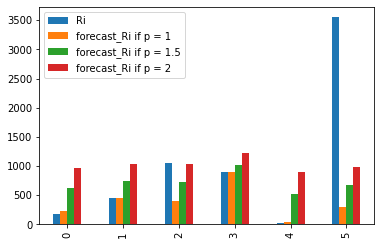

In [29]:
df.loc[:,["Ri","forecast_Ri if p = 1","forecast_Ri if p = 1.5","forecast_Ri if p = 2"]].plot(kind = "bar")

8)At p = 2 have we have actual revnue and forecast revnue have same for video {3,4,5}.so p = 2 is good fit.and p = 1 and p = 1.5 is not good as p = 2.


9)p = 2 have good fit value than p= 1 and p = 1.5 using least square.